In [15]:
import glob
import os

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import tifffile
from libtiff import TIFF

from PIL import Image

from tqdm import tqdm

In [16]:
def read_tiff_slice(file_name, n_slice):
    with tifffile.TiffFile(file_name) as f:
        return f.asarray(n_slice)
    
    
def save_seq_as_multitiff_stack(images, file_name):
    imlist = []
    for i in range(len(images)):

        imlist.append(Image.fromarray(images[i]))
        #im.fp.close()

    imlist[0].save(file_name, save_all=True, append_images=imlist[1:])

In [25]:
path = '/mnt/HD-LSDF/sd18a004/ulm/A2021-031-019033/Experiment1/'
output_path = '/mnt/LSDF/tomo/ershov/batteries/A2021-031-019033/Experiment1/'

#datasets = ['25', '50', '75', '100', '125', '150', '175', '200', '225', '250', '275', '300']
datasets = ['50', '75', '100', '125', '150', '175', '200', '225', '250']

In [11]:
im = read_tiff_slice(path + datasets[1] + 'mV/' + 'tomo_02-slices-pr.tif', 500)

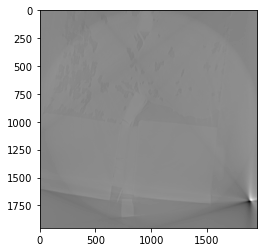

In [14]:
plt.imshow(im, cmap='gray')

In [40]:
slice_num = 1400

results = []
for d in datasets:
    im = read_tiff_slice(path + d + 'mV/' + 'tomo_01-slices-pr.tif', slice_num)
    results.append(im)
    

In [41]:
save_seq_as_multitiff_stack(results, output_path + f'seq_tomo1_{slice_num}.tif')
